In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the CSV file
missingdf = pd.read_csv("E:/DATA SETS/Missing.Value.Data.csv")

In [3]:
#we remove missings first. Let's see how many missings we have
missingdf.isnull().sum()

S.No              0
Customer.ID       1
Customer.Name     2
Customer.Age      4
Date              0
Product.Bought    3
Quantity          6
Sales             7
dtype: int64

In [4]:
missingdf.shape

(28, 8)

## Handling Missing Values

### Dropping Entire Rows

If the missing values are not that much (just a few rows), we can drop them. However, this is done for MCAR, which we have not been able to prove from the above diagrams

Still, we show the dropping functionality below for an example

In [5]:
#drops all the missing values from the dataframe
missingdf = missingdf.dropna(axis=0)

In [6]:
#check
missingdf.isnull().sum()

S.No              0
Customer.ID       0
Customer.Name     0
Customer.Age      0
Date              0
Product.Bought    0
Quantity          0
Sales             0
dtype: int64

In [7]:
missingdf.shape

(13, 8)

In [8]:
#read the CSV file again
missingdf = pd.read_csv("E:/DATA SETS/Missing.Value.Data.csv")

In [9]:
#if you want to delete rows for one of the specified variable, say Customer.Name
missingdf = missingdf.dropna(axis=0, subset=['Customer.Name'])

In [10]:
#check
missingdf.isnull().sum()

S.No              0
Customer.ID       0
Customer.Name     0
Customer.Age      3
Date              0
Product.Bought    2
Quantity          6
Sales             7
dtype: int64

In [11]:
#shape has also changed because the 2 rows of Customer.Name missing values have been deleted
missingdf.shape

(26, 8)

### Imputation

Explanation: We have imprted Simple Imputer from sklearn and we are trying to fill the null values using mean stretagy which will basically fill all null values with the average of that column

In [12]:
from sklearn.impute import SimpleImputer

#create a separate data frame for mean imputation
missingdf_mean = missingdf.copy(deep=True)



In [13]:
missingdf_mean.shape

(26, 8)

In [14]:
mean_imputation = SimpleImputer(strategy='mean')

#take only columns where mean imputation matters, i.e., numerical columns
missingdf_mean[['Customer.Age','Sales','Quantity']] = mean_imputation.fit_transform(missingdf_mean[['Customer.Age','Sales','Quantity']])

In [15]:
missingdf_mean.isnull().sum()

S.No              0
Customer.ID       0
Customer.Name     0
Customer.Age      0
Date              0
Product.Bought    2
Quantity          0
Sales             0
dtype: int64

In [14]:
missingdf.head(5)

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0
4,5,104.0,Imran,45.0,16/10/2019,Table,NaN,17900.0


In [16]:
missingdf_mean.head(5)

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0
4,5,104.0,Imran,45.0,16/10/2019,Table,1.8,17900.0


In [17]:
#check
missingdf_mean.isnull().sum()

S.No              0
Customer.ID       0
Customer.Name     0
Customer.Age      0
Date              0
Product.Bought    2
Quantity          0
Sales             0
dtype: int64

We now plot to see whether the distribution remains the same after the missing values have been filled in

<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

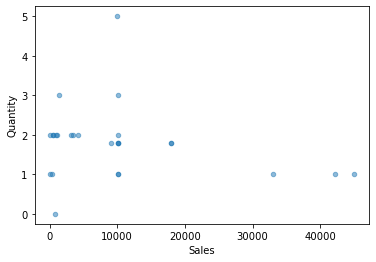

In [18]:
#comparing sales vs quantity (values filled in by mean)
missingdf_mean.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,cmap='rainbow')

In [19]:
#now, lets determine those rows where values of either sales or quantity went missing
nulls =  missingdf['Sales'].isnull() + missingdf['Quantity'].isnull()
nulls

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


0     False
1     False
2     False
3     False
4      True
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12     True
13     True
14    False
15     True
16    False
17    False
18    False
21     True
22    False
23     True
24     True
25     True
26    False
27    False
dtype: bool

Explanation: As we can see that null values follow the same distribution which means mean stretagy is quite good

<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

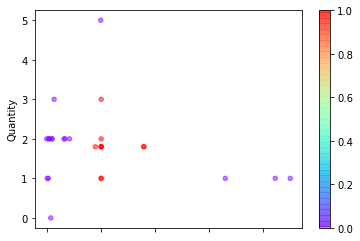

In [20]:
#Now, lets plot them together
missingdf_mean.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,c=nulls,cmap='rainbow')

From the above, we can conclude that values have been filled in according to the given distribution because the purple marks are following the same pattern as the red ones

<AxesSubplot:xlabel='Sales', ylabel='Customer.Age'>

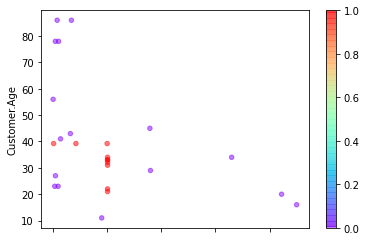

In [21]:
nulls =  missingdf['Sales'].isnull() + missingdf['Customer.Age'].isnull()
missingdf_mean.plot(x='Sales',y='Customer.Age',kind='scatter',alpha=0.5,c=nulls,cmap='rainbow')

### K-NN Based Imputation

In KNN imputer, we basically give a value k which will be used to determine the value we want to fill our missing values with. For exmple, if we select 5 k value, the algorithm will look at 5 nearest k values to determine the suitable value for null value

In [23]:
#read the CSV file again
missingdf = pd.read_csv("D:/DataSets/Missing.Value.Data.csv")

from sklearn.impute import KNNImputer
imputer = KNNImputer (n_neighbors=2)
missingdf_knn = missingdf.copy(deep=True)
missingdf_knn[['Customer.Age','Sales','Quantity']] = imputer.fit_transform(missingdf_knn[['Customer.Age','Sales','Quantity']])
missingdf_knn.head()

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0
4,5,104.0,Imran,45.0,16/10/2019,Table,1.0,17900.0


<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

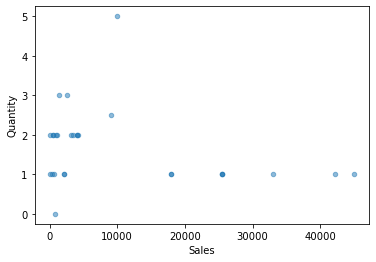

In [24]:
#comparing sales vs quantity (values filled in by knn)
missingdf_knn.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,cmap='rainbow')

The distribution doesn't follow quite good that's maybe because we have selected too low value of k

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

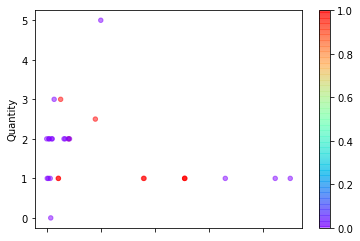

In [25]:
nulls =  missingdf['Sales'].isnull() + missingdf['Quantity'].isnull()
missingdf_knn.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,c=nulls,cmap='rainbow')

k = 8

In [27]:
#read the CSV file again
missingdf = pd.read_csv("D:/DataSets/Missing.Value.Data.csv")

from sklearn.impute import KNNImputer
imputer = KNNImputer (n_neighbors=8)
missingdf_knn = missingdf.copy(deep=True)
missingdf_knn[['Customer.Age','Sales','Quantity']] = imputer.fit_transform(missingdf_knn[['Customer.Age','Sales','Quantity']])
missingdf_knn.head()

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.000,945.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.000,324.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.000,45000.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.000,33000.0
4,5,104.0,Imran,45.0,16/10/2019,Table,2.125,17900.0


<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

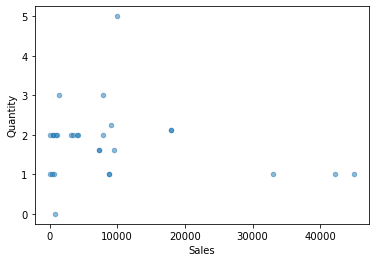

In [28]:
#comparing sales vs quantity (values filled in by knn)
missingdf_knn.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,cmap='rainbow')

BETTER! see that missing values follow the same distribution hence KNN imputer is better with 8 k value.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

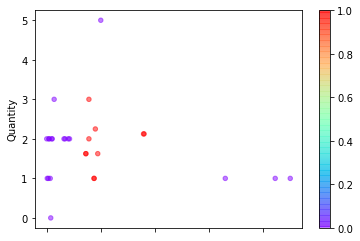

In [29]:
nulls =  missingdf['Sales'].isnull() + missingdf['Quantity'].isnull()
missingdf_knn.plot(x='Sales',y='Quantity',kind='scatter',alpha=0.5,c=nulls,cmap='rainbow')

You can see from above that the gray dots are again following the same pattern of red dots so the filling up of missing values seems ok